In [1]:
using CMBLensing
using ProgressMeter
using PyPlot
using Statistics

In [2]:
@unpack ϕ, ds₀ = load_sim_dataset(
    seed = 3,
    θpix = 3,
    T = Float32,
    Nside = 128,
    use = :P,
    μKarcminT = 1,
    M = 1,
    B = 1,
);

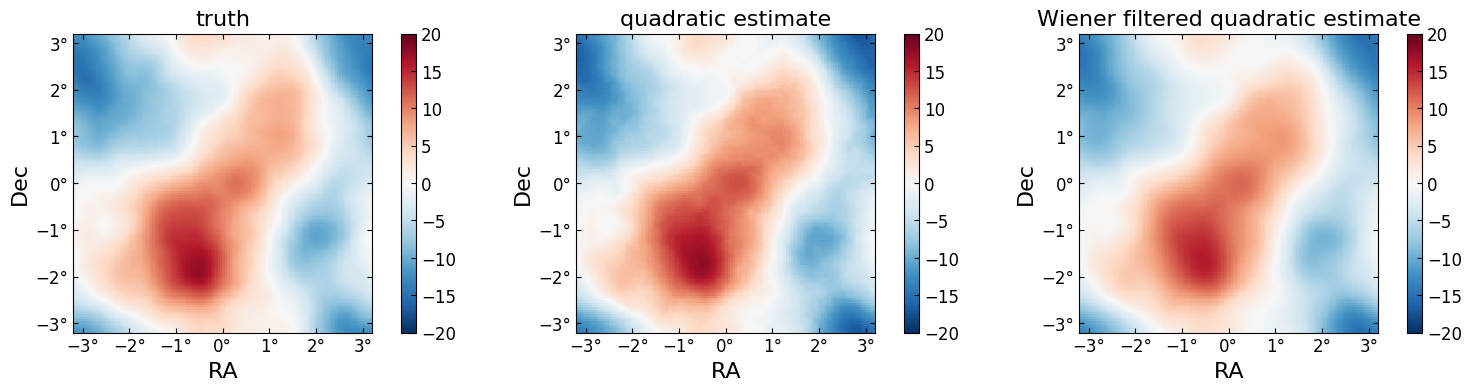

(Figure(PyObject <Figure size 1680x400 with 6 Axes>), PyCall.PyObject[PyObject <matplotlib.axes._subplots.AxesSubplot object at 0x7fcc6281c908> PyObject <matplotlib.axes._subplots.AxesSubplot object at 0x7fcc787bf780> PyObject <matplotlib.axes._subplots.AxesSubplot object at 0x7fcc787e8cf8>], Symbol[:Tx])

In [3]:
plot(10^6 .* [ϕ ϕqe(ds₀,false)[1] ϕqe(ds₀,true)[1]], title=["truth" "quadratic estimate" "Wiener filtered quadratic estimate"], vlim=20)

In [4]:
ϕqem = mean(@showprogress [ϕqe(resimulate(ds₀,ϕ=ϕ),false)[1] for i=1:100]);

Progress: 100%|█████████████████████████████████████████| Time: 0:00:48


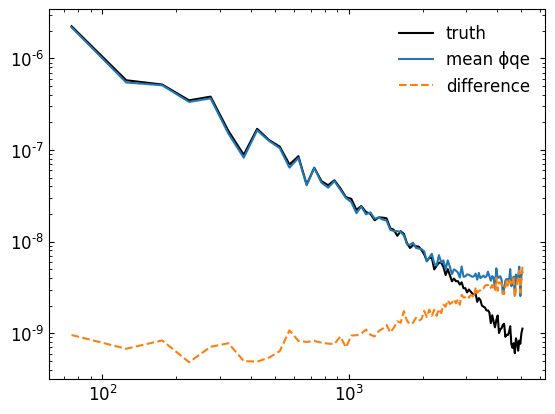

In [5]:
loglog(get_ℓ⁴Cℓ(ϕ)..., "k")
loglog(get_ℓ⁴Cℓ(ϕqem)...)
loglog(get_ℓ⁴Cℓ(ϕ-ϕqem)...,"--")
legend(["truth","mean ϕqe","difference"]);